In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


"#replacing blanks with 0 as tenure is 0 and no total charges are recorded "

In [ ]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df["customerID"].duplicated().sum()

0

In [ ]:
def conv(value):
  if value == 1:
      return "Yes"
  else:
      return "NO"

  df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

"#converted 0 and 1 values of senior citizen to yes/no to make it easier to understand"

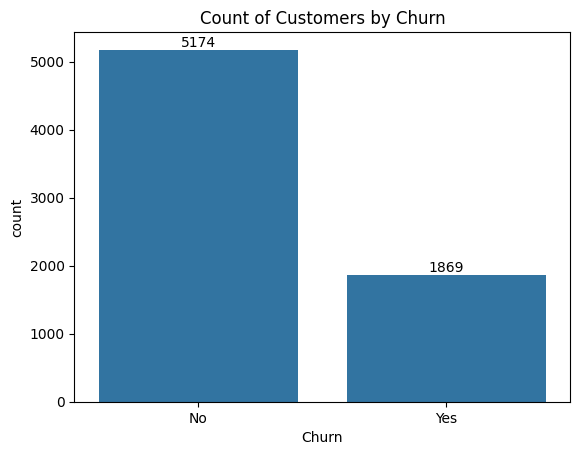

In [ ]:
ax = sns.countplot(x = df['Churn'] , data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

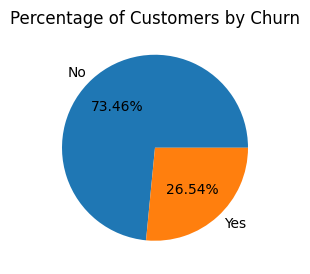

In [ ]:
plt.figure(figsize =(3,4))
gb = df.groupby('Churn').agg({'Churn':"count"})
plt.pie(gb['Churn'] , labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Customers by Churn")
plt.show()

"#from the given pie chart we can conclude that 26.54% of our customers have churned out.

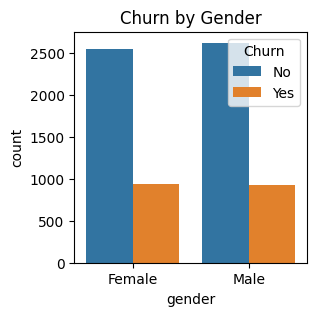

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x="gender", data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

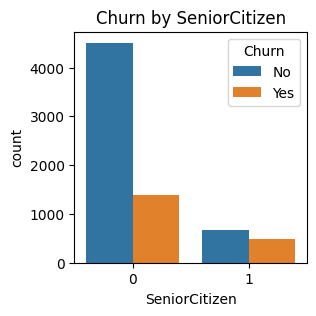

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x="SeniorCitizen", data = df, hue = "Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

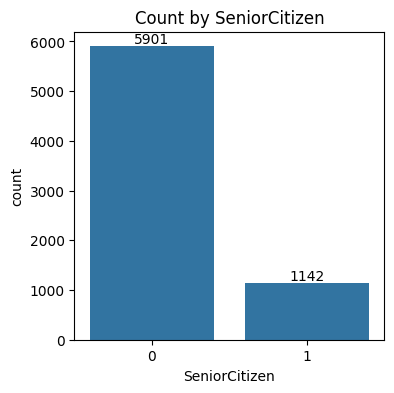

In [ ]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen",data = df)
plt.title("Count by SeniorCitizen")
ax.bar_label(ax.containers[0])
plt.show()

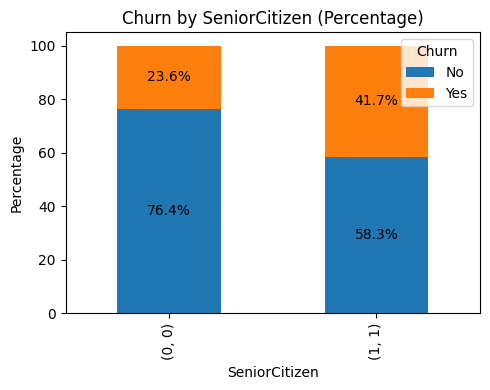

In [57]:
# Step 1: Calculate percentage breakdown
stacked_data = (
    df.groupby(["SeniorCitizen", "Churn"])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
    .unstack()
)

# Step 2: Plot the stacked bar chart
ax = stacked_data.plot(
    kind="bar",
    stacked=True,
    figsize=(5, 4),
    color=["#1f77b4", "#ff7f0e"]
)

# Step 3: Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center")

plt.title("Churn by SeniorCitizen (Percentage)")
plt.ylabel("Percentage")
plt.xlabel("SeniorCitizen")
plt.legend(title="Churn", loc="upper right")
plt.tight_layout()
plt.show()

"#comparative a greater pecentage of people in senior citizen category have churned"

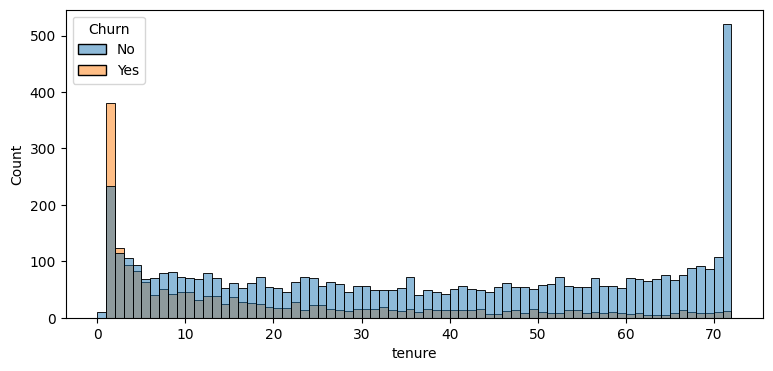

In [61]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

"#people who have used our services for a long time have stayed and people who have used our sevices \n",
    "#1 or 2 months  have churned"

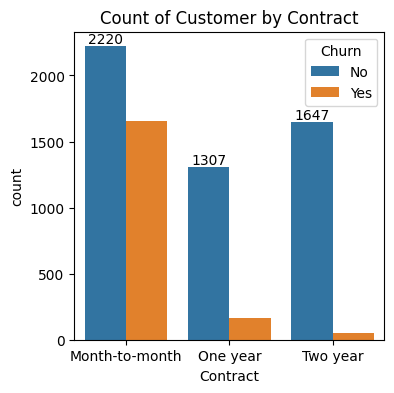

In [62]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract",data = df, hue = "Churn")
plt.title("Count of Customer by Contract")
ax.bar_label(ax.containers[0])
plt.show()

"#people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract. "

In [63]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

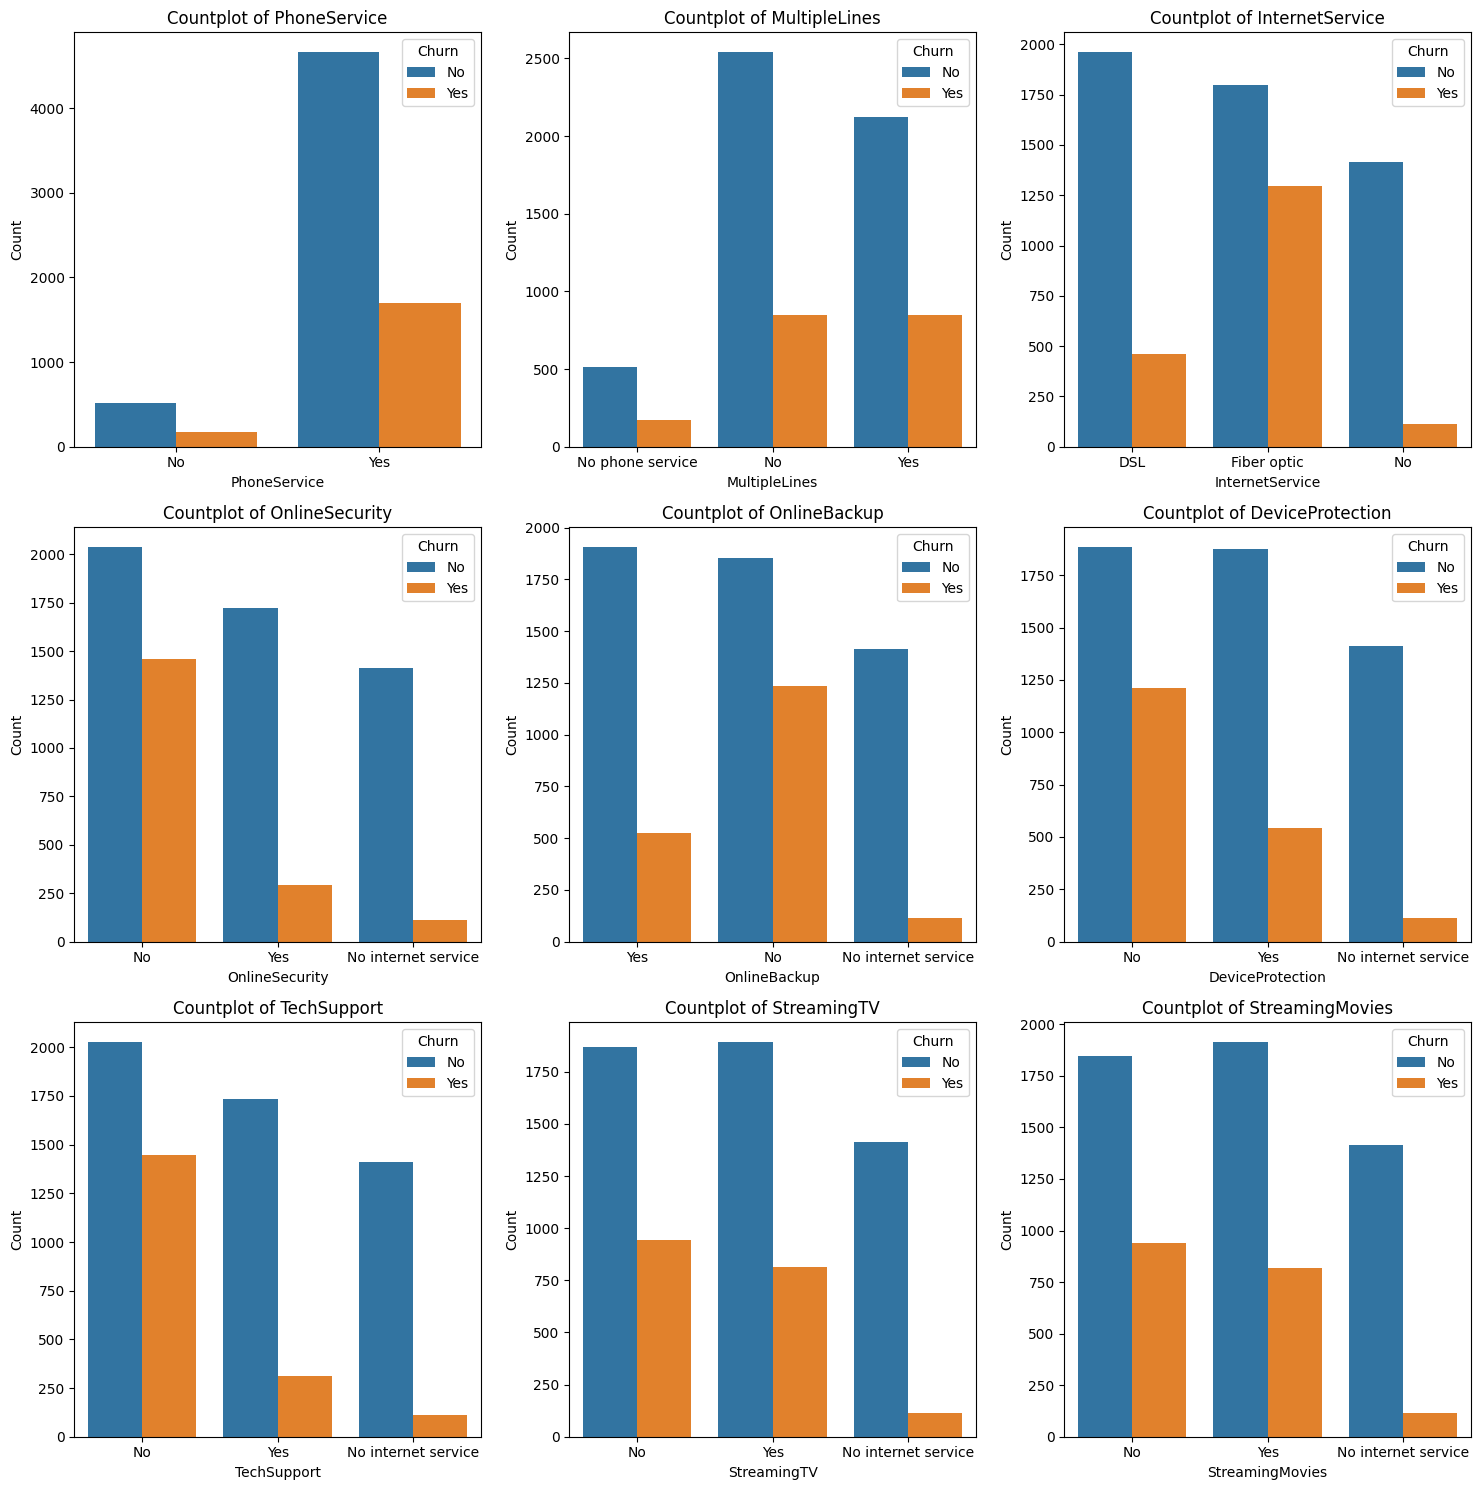

In [70]:
# List of columns to plot
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Create subplots: determine grid size
num_cols = len(columns)
cols_per_row = 3  # Number of subplots per row
num_rows = -(-num_cols // cols_per_row)  # Ceiling division

# Create figure and subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each column in a separate subplot
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue =df["Churn"])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)

# Hide any unused subplots
for j in range(len(columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

"#The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable. "

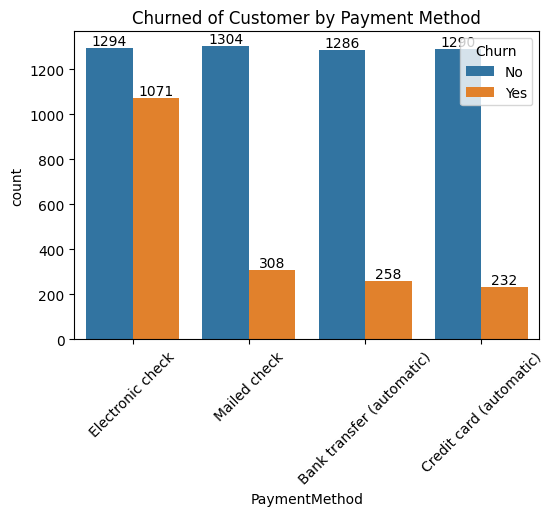

In [71]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod",data = df, hue = "Churn")
plt.title("Churned of Customer by Payment Method")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 45)
plt.show()

"#customer is likely to churn when he is using electronic check as a payment method. "